### Name: Pranav Nair
### Company: Stout
### Case Study
### Date: February 18th 2021

In [31]:
# Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import scikitplot as skplt
from mlxtend.plotting import plot_linear_regression
from sklearn import metrics
from sklearn.linear_model import LinearRegression as lm

In [2]:
data = pd.read_csv('data.csv')

In [3]:
# Clean data
# drop isFlagged Fraud
# check null values
data.drop('isFlaggedFraud', axis=1, inplace=True)
data.drop('type', axis=1, inplace=True)
data.drop('nameOrig', axis=1, inplace=True)
data.drop('nameDest', axis=1, inplace=True)

In [4]:
# Check for null values
data.isnull().any().any()

False

In [5]:
X = data.iloc[:, 1:6] # Feature set
y = data['isFraud'] # label

In [7]:
# Remove random_state for different train and test data
# Splits training and test data in the form of 75% and 25% respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [10]:
# Algorithm 1: Linear Regression
lr = LinearRegression()

In [11]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
y_pred = lr.predict(X_test)

In [13]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [14]:
df.head()

,Actual,Predicted
3737323,0,-0.022795
264914,0,0.002710
85647,0,-0.009661
5899326,0,0.006834
2544263,0,-0.001498


### The first algorithm implemented is Linear Regression. We first fit the training data of X and y into the Linear Regression model. Next, we use the model to predict the label values and compare the output with the test values of y. The metrics used for comparing the predicted and actual values are mean absolute error, mean squared error and root mean squared error

In [15]:
# Evaluation of predictions
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.006444864908272446
Mean Squared Error: 0.0010959681002542013
Root Mean Squared Error: 0.03310540892745778


In [17]:
# Algorithm 2: Naive Bayes
gnb = GaussianNB()

In [18]:
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [19]:
print("Number of mislabeled points out of a total %d points : %d"
...       % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 1590655 points : 11519


In [20]:
nb = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

### The second algorithm implemented is Naive Bayes. This is a supervised learning algorithm perfect for this dataset. We first fit the training data of X and y into the gaussian naive bayes model to predict the label values and similarily to the linera regression algorithm we compare the output with the test values of y. The metrics used for comparing the predicted and actual values is the accuracy. We get a 99.27 % accuracy value which is an indication of how accurate the model is at making predictions.

In [22]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.992758329115993


### Data Visualization

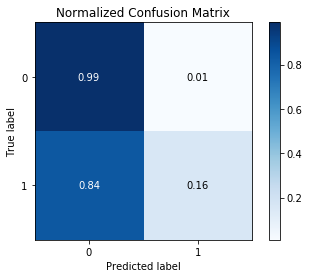

In [26]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

### I created a normalized confusion matrix that shows the correctly predicted values and incorrect values. The correct predictions are shown when the true label and predicted label are the same.

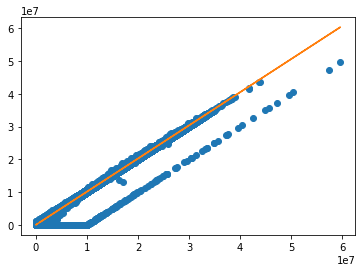

In [29]:
# Old vs New Balance Origin comparison

X_data = data['oldbalanceOrg']
y_data = data['newbalanceOrig']
plt.plot(X_data, y_data, 'o')
m, b = np.polyfit(X_data, y_data, 1)
plt.plot(X_data, m*X_data + b)

### I created a comparison scatter plot graph for two important features of the dataset which are the old balance origin and new balance origin. We observe the trend of the two features are similar in progression and have little to no outliers.

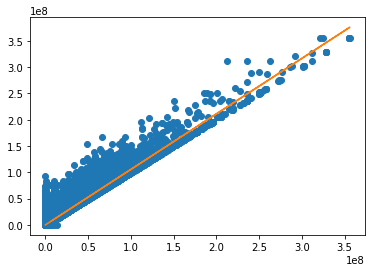

In [30]:
# Old vs New Balance Destination comparison

X_data = data['oldbalanceDest']
y_data = data['newbalanceDest']
plt.plot(X_data, y_data, 'o')
m, b = np.polyfit(X_data, y_data, 1)
plt.plot(X_data, m*X_data + b)

### I created another comparison scatter plot graph for the balance dest features of the dataset. We observe the trend of the two features are similar and overlap each other in progression and have a few outliers.

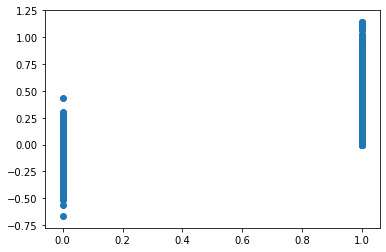

In [32]:
model=lm().fit(X_train,y_train)
predictions=model.predict(X_test)
plt.scatter(y_test,predictions)

### This is a scatter plot graph that shows the y_test and predicted values. We observe that the predictions for isFraud label = 1 is 100 % accuracy wheras for isFraud label = 0 is close to 100 % accuracy with a few inaccurate predictions